In [1]:
import os
import sys
sys.path.append('..')

from scripts.modeling.evaluation import *
from scripts.modeling.model_selection import *
from scripts.data_utils.loaders import load_data, save_data
from scripts.utils.visualizations import visualize_rf_tree, visualize_xgb_tree
from scripts.modeling.preprocessing import split_data, preprocess_data, scale_features, time_series_split_data
from scripts.data_utils.feature_engineering import generate_lag_and_rolling_features, apply_cyclical_encoding

%load_ext autoreload
%autoreload 2

In [2]:
# file_path = r"../data/AlphaCare_Risk_Insurance_data_Risk_ProfitMargin_processed.csv"
# processed_df = load_data(file_path)
# df = processed_df
# df.shape

In [3]:
# # Apply preprocessing
# df_preprocessed = preprocess_data(df)
# temp_df = df
# df = df_preprocessed
# df.shape

In [4]:
# # dvc add data/AlphaCare_Risk_Insurance_data_All_processed.csv
# # git commit -am "Update dataset with new features"
# # dvc push 
# # dvc diff

# output_path = r'../data/AlphaCare_Risk_Insurance_data_All_processed.csv'
# save_data(df, output_path)

In [5]:
file_path = r"../data/AlphaCare_Risk_Insurance_data_All_processed.csv"
df = load_data(file_path)
df.shape

Data loaded successfully.


(618464, 113)

In [6]:
# Split data into training and testing sets

# target_variable = 'ProfitMargin'
# target_variable = 'Risk'
# drop_columns = ['TotalClaims', 'TotalPremium'] # For  Risk and ProfitMargin

# target_variable = 'TotalPremium'
target_variable = 'TotalClaims'
drop_columns = ['Risk', 'ProfitMargin'] # For  TotalClaims and TotalPremium
df_feed = df.drop(columns=drop_columns, axis=1)
X_train, X_test, y_train, y_test = split_data(df_feed, target_variable=target_variable)

Starting split_data process...
Finished split_data process.


In [7]:
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

Starting scale_features process...
Finished scale_features process.


In [8]:
# Model training
lr_model = train_linear_regression(X_train_scaled, y_train)
evaluate_model(lr_model, X_test_scaled, y_test)

{'MAE': 239.0504687929899,
 'MSE': 10594214.04402263,
 'R2': 0.00646950677150171,
 'Median AE': 43.6687604980996,
 'Explained Variance': 0.006474819005727328}

In [41]:
import numpy as np

# Normalize coefficients and convert to percentage
normalized_coefs = (lr_model.coef_ / np.sum(np.abs(lr_model.coef_))) * 100

# Sort coefficients by absolute value in descending order
sorted_coefs = sorted(zip(X_train.columns, normalized_coefs), key=lambda x: abs(x[1]), reverse=True)

# Print sorted coefficients with their respective importance in percentage
for feature, importance in sorted_coefs:
    print(f"{feature}: {importance:.2f}%")


TotalPremium: 12.37%
CoverGroup_Comprehensive - Taxi: 7.31%
Section_Optional Extended Covers: 7.25%
Model_QUANTUM 2.7 SESFIKILE 16s: -5.84%
VehicleIntroDate_4/2012: 5.49%
CoverType_Own Damage: 4.45%
CalculatedPremiumPerTerm: 4.04%
Model_QUANTUM 2.5 D-4D SESFIKILE 16s: -4.00%
CoverType_Windscreen: 2.39%
VehicleIntroDate_11/2007: -2.34%
bodytype_P/V: 2.05%
VehicleType_Passenger Vehicle: 1.91%
Section_Other: 1.80%
Model_QUANTUM 2.7 SESFIKILE 14s: 1.70%
Model_Other: -1.08%
Bank_nan: -1.07%
bodytype_Other: 1.05%
Bank_Other: 1.02%
Citizenship_ZA: -0.99%
Province_North West: -0.94%
CoverType_Third Party: -0.88%
CoverCategory_Third Party: -0.88%
Model_QUANTUM 2.7 SESFIKILE 15s: -0.80%
IsWeekend: -0.79%
CoverCategory_Signage and Vehicle Wraps: 0.78%
CoverType_Signage and Vehicle Wraps: 0.78%
CoverType_Keys and Alarms: 0.76%
CoverCategory_Keys and Alarms: 0.76%
SumInsured: 0.76%
CoverCategory_Emergency Charges: 0.75%
CoverType_Emergency Charges: 0.75%
CoverCategory_Cleaning and Removal of Accide

In [9]:
xgb_model = train_xgboost(X_train, y_train)
evaluate_model(xgb_model, X_test_scaled, y_test)

{'MAE': 437.7255310156639,
 'MSE': 13577978.710098108,
 'R2': -0.27334938003268894,
 'Median AE': 8.846724510192871,
 'Explained Variance': -0.2683478205907728}

<Figure size 150000x15000 with 0 Axes>

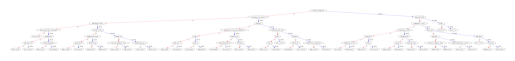

In [34]:
visualize_xgb_tree(xgb_model, tree_index=0)

In [11]:
rf_model = train_random_forest(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

{'MAE': 242.74139024272176,
 'MSE': 12833750.061817218,
 'R2': -0.20355525911642536,
 'Median AE': 0.0,
 'Explained Variance': -0.2034492643327639}

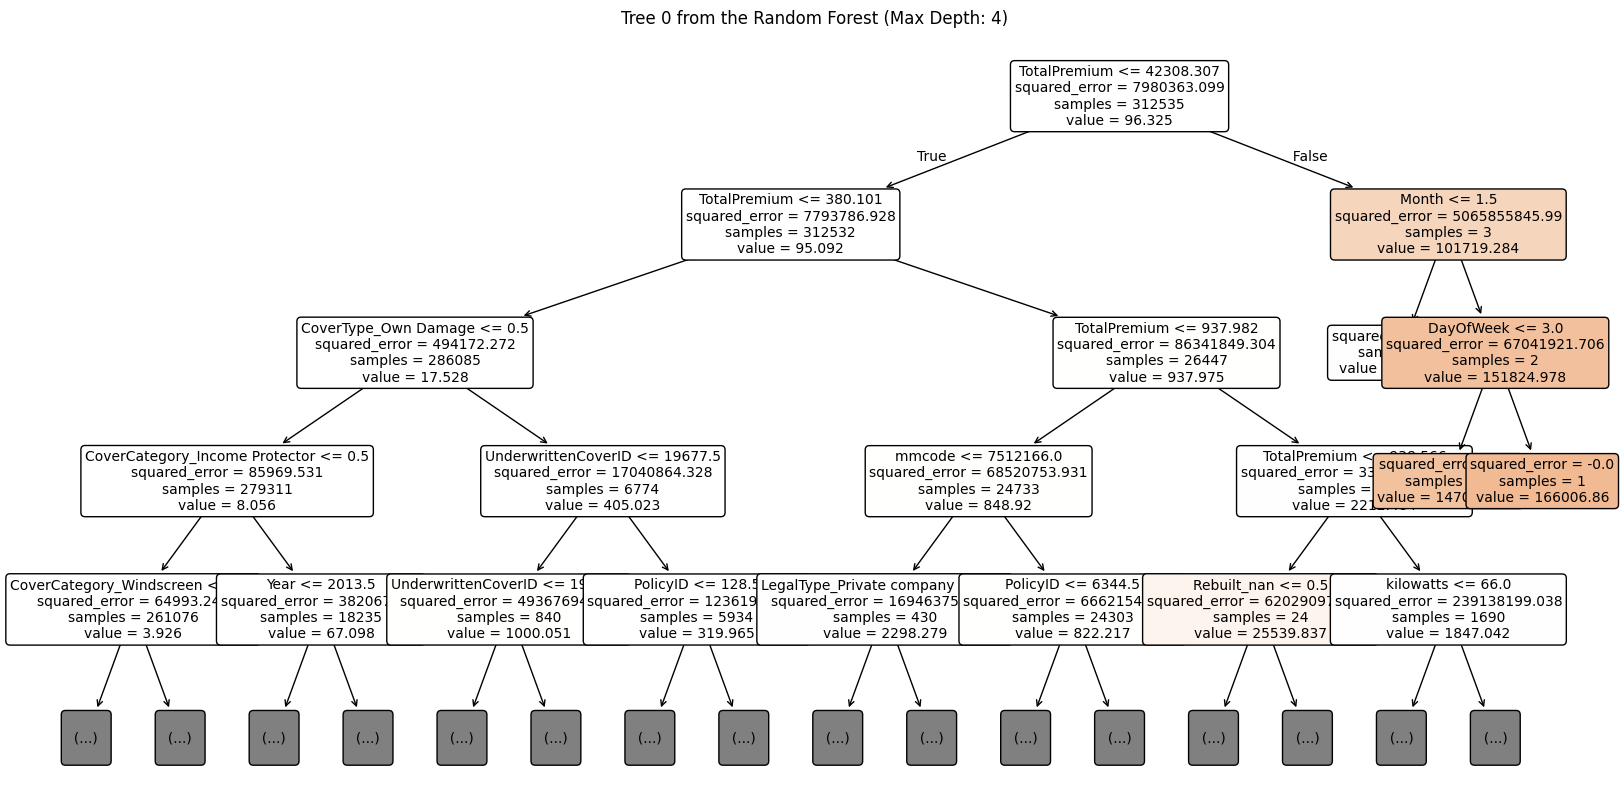

In [12]:
visualize_rf_tree(rf_model, df_feed.columns[df_feed.columns != target_variable].tolist(), tree_index=0, max_depth=4)

In [13]:
# # Model evaluation
# models = {"Linear Regression": lr_model, "Random Forest": rf_model, "XGBoost": xgb_model}

# for name, model in models.items():
#     print(f"Evaluating {name}:")
#     print(evaluate_model(model, X_test, y_test))
#     print(evaluate_model(model, X_test_scaled if name == "Linear Regression" else X_test, y_test))

In [14]:
# Global
feature_names = X_train.columns
feature_importance(rf_model, feature_names)

[('Month', 0.14668439513959547),
 ('UnderwrittenCoverID', 0.12645587437326042),
 ('DayOfWeek', 0.10615035530747331),
 ('PolicyID', 0.06921305227229194),
 ('TotalPremium', 0.06720942097402159),
 ('CalculatedPremiumPerTerm', 0.057025518460975214),
 ('SumInsured', 0.05693033940784738),
 ('Quarter', 0.052557088432245276),
 ('PostalCode', 0.04634830368515421),
 ('IsWeekend', 0.030485709144321693),
 ('CapitalOutstanding_nan', 0.01706814562800146),
 ('VehicleAge', 0.016807649604727463),
 ('mmcode', 0.010788574555823636),
 ('kilowatts', 0.00989497853383328),
 ('AccountType_Savings account', 0.009792157104005631),
 ('Bank_First National Bank', 0.008902563267006381),
 ('TrackingDevice_Yes', 0.008328376136574249),
 ('cubiccapacity', 0.0076366031541690105),
 ('Bank_Nedbank', 0.007368578906684134),
 ('Rebuilt_nan', 0.0065364259676253915),
 ('Year', 0.006393813592239261),
 ('Bank_Standard Bank', 0.005995010896763233),
 ('CoverType_Own Damage', 0.0058987994239401605),
 ('WrittenOff_nan', 0.0057647965

In [15]:
feature_importance(xgb_model, feature_names)

[('MainCrestaZone_Transvaal (all except Pretoria)', 0.08911476),
 ('CapitalOutstanding_Other', 0.05855759),
 ('Citizenship_ZA', 0.04019405),
 ('Model_QUANTUM 2.7 SESFIKILE 15s', 0.037990328),
 ('DayOfWeek', 0.033021618),
 ('Bank_Other', 0.032113764),
 ('Title_Other', 0.030580275),
 ('Month', 0.029637273),
 ('CoverType_Own Damage', 0.028098462),
 ('bodytype_Other', 0.027095916),
 ('TrackingDevice_Yes', 0.025762787),
 ('SumInsured', 0.025533384),
 ('CapitalOutstanding_nan', 0.023513434),
 ('WrittenOff_nan', 0.022712812),
 ('VehicleIntroDate_4/2012', 0.021626486),
 ('AccountType_Savings account', 0.020384135),
 ('Bank_Capitec Bank', 0.020002874),
 ('Year', 0.019459907),
 ('Bank_Standard Bank', 0.01923005),
 ('SubCrestaZone_Transvaal North West', 0.017739432),
 ('Gender_Other', 0.01716494),
 ('UnderwrittenCoverID', 0.017092869),
 ('Bank_First National Bank', 0.01698119),
 ('MainCrestaZone_Natal (Durban)', 0.016738068),
 ('Province_Mpumalanga', 0.015355457),
 ('Province_Other', 0.015282264)

In [16]:
model = rf_model
# model = xgb_model

In [20]:
(X_train.values).shape, (X_test.values).shape

((494771, 110), (123693, 110))

In [17]:
shap_values, explainer = get_shap_values(model, X_test, method='shap')

100%|===================| 123688/123693 [84:35<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 77042.139847, while the model output was 84752.973684. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
# Global importance
global_feature_importance(shap_values, X_test, feature_names)

In [ ]:
# Feature dependence plot
feature_name = feature_names[0]
feature_dependence_plot(feature_name, shap_values, X_test)

In [ ]:
local_feature_explanation(explainer, shap_values, X_test, instance_idx=0)

In [ ]:
shap_values_tree, explainer_tree = get_shap_values(model, X_test, method='shap')

In [ ]:
# Global importance
global_feature_importance(shap_values_tree, X_test, feature_names)

In [ ]:
# Feature dependence plot
feature_name = feature_names[0]
feature_dependence_plot(feature_name, shap_values_tree, X_test)

In [ ]:
local_feature_explanation(explainer_tree, shap_values_tree, X_test, instance_idx=0)

In [ ]:
# feature_importance_shap(xgb_model, X_test, feature_names=None)
feature_importance_shap(rf_model, X_test, feature_names=None)

In [ ]:
# Feature importance analysis using SHAP for Random Forest
# feature_importance_shap_tree(xgb_model, X_test, feature_names=feature_names)
feature_importance_shap_tree(rf_model, X_test, feature_names=feature_names)

In [22]:
# feature_importance_lime(xgb_model, X_test, feature_names, instance_idx=2)
feature_importance_lime(rf_model, X_test, feature_names, instance_idx=1)

c:\Users\Darkles\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 6911.233737404973
Prediction_local [-85.79661478]
Right: 0.0


In [23]:
# feature_importance_lime(xgb_model, X_test, feature_names, instance_idx=1)
feature_importance_lime(rf_model, X_test, feature_names, instance_idx=1)

Intercept 5415.658084683281
Prediction_local [-69.74074234]
Right: 0.0


c:\Users\Darkles\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# explain_model(xgb_model, X_test, feature_names=None, method='shap', instance_idx=None, output_file=None)

In [97]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}
tuned_rf_model, best_params = hyperparameter_tuning(RandomForestRegressor(), param_grid, X_train, y_train)

evaluate_model(tuned_rf_model, X_test, y_test), evaluate_model(rf_model, X_test, y_test)

KeyboardInterrupt: 

# Time-series data

In [ ]:
df = apply_cyclical_encoding(df)

In [ ]:
processed_data = generate_lag_and_rolling_features(df, date_column="TransactionMonth", target_column="TotalClaims")

In [ ]:
X_train, X_test, y_train, y_test = time_series_split_data(processed_data, "TransactionMonth", "TotalClaims", "2015-07-01")